# GridSearchCV 

GridSearchcv for best params , Roc and auc

For Model Optimatiztion

In [1]:
import pandas as pd
from sklearn.model_selection  import train_test_split , cross_val_score

In [2]:
df = pd.read_csv('pima-indians-diabetes+29.csv')

In [3]:
df

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
x = df.drop('class' , axis = 1)
y = df['class']

# Dividing data into 3 parts : Training , Validation and Testing data

In [5]:
#80% for training and validation
#20% for testing

In [6]:
x_train1 , x_test , y_train1 , y_test = train_test_split(x,y,test_size = 0.2 , random_state = 1)

x_train2 , x_val , y_train2 , y_val = train_test_split(x_train1,y_train1,test_size = 0.2 , random_state = 1)

In [7]:
x

,Preg,Plas,Pres,skin,test,mass,pedi,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [8]:
print('Total dataset: ' ,len(x.values))
print('Total test data saved for future use: ' , len(x_test+y_test))
print('Total training data: ' , len(x_train2 + y_train2))
print('Total validation data ',len(x_val+y_val))

Total dataset:  768
Total test data saved for future use:  154
Total training data:  491
Total validation data  123


In [9]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train2, y_train2)

KNeighborsClassifier()

In [10]:
KNeighborsClassifier().get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [11]:
param_grid = {'n_neighbors':list(range(1,9)),
             'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute')
             }

In [12]:
from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(knn_clf , param_grid , cv = 20)

In [13]:
gs.fit(x_train2, y_train2)

GridSearchCV(cv=20, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8]})

In [14]:
gs.best_params_

{'algorithm': 'auto', 'n_neighbors': 8}

In [15]:
gs.cv_results_['params']

[{'algorithm': 'auto', 'n_neighbors': 1},
 {'algorithm': 'auto', 'n_neighbors': 2},
 {'algorithm': 'auto', 'n_neighbors': 3},
 {'algorithm': 'auto', 'n_neighbors': 4},
 {'algorithm': 'auto', 'n_neighbors': 5},
 {'algorithm': 'auto', 'n_neighbors': 6},
 {'algorithm': 'auto', 'n_neighbors': 7},
 {'algorithm': 'auto', 'n_neighbors': 8},
 {'algorithm': 'ball_tree', 'n_neighbors': 1},
 {'algorithm': 'ball_tree', 'n_neighbors': 2},
 {'algorithm': 'ball_tree', 'n_neighbors': 3},
 {'algorithm': 'ball_tree', 'n_neighbors': 4},
 {'algorithm': 'ball_tree', 'n_neighbors': 5},
 {'algorithm': 'ball_tree', 'n_neighbors': 6},
 {'algorithm': 'ball_tree', 'n_neighbors': 7},
 {'algorithm': 'ball_tree', 'n_neighbors': 8},
 {'algorithm': 'kd_tree', 'n_neighbors': 1},
 {'algorithm': 'kd_tree', 'n_neighbors': 2},
 {'algorithm': 'kd_tree', 'n_neighbors': 3},
 {'algorithm': 'kd_tree', 'n_neighbors': 4},
 {'algorithm': 'kd_tree', 'n_neighbors': 5},
 {'algorithm': 'kd_tree', 'n_neighbors': 6},
 {'algorithm': 'kd

In [16]:
gs.cv_results_['mean_test_score']

array([0.67008333, 0.69508333, 0.69266667, 0.71308333, 0.70883333,
       0.72325   , 0.725     , 0.72925   , 0.67008333, 0.69508333,
       0.69266667, 0.71308333, 0.70883333, 0.72325   , 0.725     ,
       0.72925   , 0.67008333, 0.69508333, 0.69266667, 0.71308333,
       0.70883333, 0.72325   , 0.725     , 0.72925   , 0.67008333,
       0.69508333, 0.69266667, 0.71308333, 0.70883333, 0.72325   ,
       0.725     , 0.72925   ])

In [17]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors = 8 , algorithm = 'auto')
knn_clf.fit(x_train2, y_train2)

KNeighborsClassifier(n_neighbors=8)

In [18]:
from sklearn import metrics

y_pred = knn_clf.predict(x_test)
print('Accuaracy: ',metrics.accuracy_score(y_test , y_pred))

Accuaracy:  0.7402597402597403


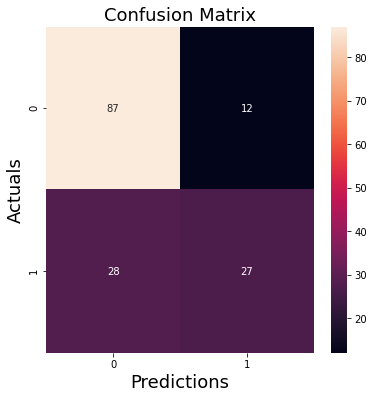

In [19]:

from sklearn.metrics import confusion_matrix
# from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt


conf_matrix = confusion_matrix(y_test,y_pred)

plt.figure(figsize=(6, 6))
import seaborn as sns
sns.heatmap(conf_matrix, annot=True)
 
# fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6))
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.76      0.88      0.81        99
           1       0.69      0.49      0.57        55

    accuracy                           0.74       154
   macro avg       0.72      0.68      0.69       154
weighted avg       0.73      0.74      0.73       154



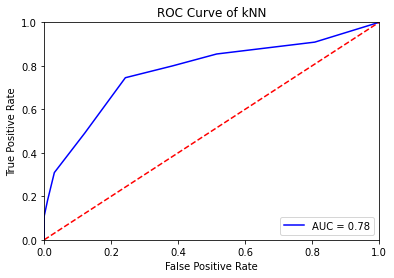

In [21]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

y_scores = knn_clf.predict_proba(x_test)
fpr , tpr , threshold = roc_curve(y_test , y_scores[: , 1])
roc_auc = auc(fpr , tpr)

plt.plot(fpr , tpr , 'b' , label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()